***🚗 BMW Sales Analysis 2010-2024***

In [4]:
# Import Libaraies:

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load DataSet:
df = pd.read_csv('/Users/ahmad786/Downloads/BMW_sales_data_2010-2024.csv')

print('Data Loaded Successfully!')

Data Loaded Successfully!


In [6]:
# Check for Number of Row and Column:
df.shape

(50000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [8]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [9]:
#Check for missing data
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [10]:
# There is no missing value we can continue with our analysis process.

In [11]:
# Calculate totals and data range
total_revenue = f"total_revenue: ${df['Price_USD'].sum():,.0f}"
print(total_revenue)

Total_sales_volume = f"Total sales volume: {df['Sales_Volume'].sum():,.0f}"
print(Total_sales_volume)


Data_period = f"Data period: {df['Year'].min()} - {df['Year'].max()} years"
print(Data_period)

total_revenue: $3,751,730,045
Total sales volume: 253,375,734
Data period: 2010 - 2024 years


In [12]:
# Top Model of BMW by Sales_Volumn Analysis:

top_model = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)
top_model.head(10)

Model
7 Series    23786466
i8          23423891
X1          23406060
3 Series    23281303
i3          23133849
5 Series    23097519
M5          22779688
X3          22745529
X5          22709749
X6          22661986
Name: Sales_Volume, dtype: int64

In [13]:
# Top Region Sales by year

region_sales = df.groupby(['Year', 'Region'])['Price_USD'].sum().reset_index()
print(region_sales)

    Year         Region  Price_USD
0   2010         Africa   43048078
1   2010           Asia   41790549
2   2010         Europe   42566033
3   2010    Middle East   39461238
4   2010  North America   41281022
..   ...            ...        ...
85  2024           Asia   45668458
86  2024         Europe   44014305
87  2024    Middle East   43114586
88  2024  North America   44780232
89  2024  South America   40022877

[90 rows x 3 columns]


In [14]:
# Top Model in year by price

model_sales = df.groupby(['Year', 'Model'])['Price_USD'].sum().reset_index()
print(model_sales)

     Year     Model  Price_USD
0    2010  3 Series   23932107
1    2010  5 Series   22055583
2    2010  7 Series   21239235
3    2010        M3   22078160
4    2010        M5   22664061
..    ...       ...        ...
160  2024        X3   24694167
161  2024        X5   20757573
162  2024        X6   26247081
163  2024        i3   24140197
164  2024        i8   23546318

[165 rows x 3 columns]


In [15]:
# Top models per year per region
top_models = df.groupby(['Year','Region','Model'])['Sales_Volume'].sum().reset_index()
print(top_models)

     Year         Region     Model  Sales_Volume
0    2010         Africa  3 Series        307811
1    2010         Africa  5 Series        251656
2    2010         Africa  7 Series        259479
3    2010         Africa        M3        206661
4    2010         Africa        M5        181521
..    ...            ...       ...           ...
985  2024  South America        X3        268823
986  2024  South America        X5        235684
987  2024  South America        X6        306467
988  2024  South America        i3        285821
989  2024  South America        i8        270668

[990 rows x 4 columns]


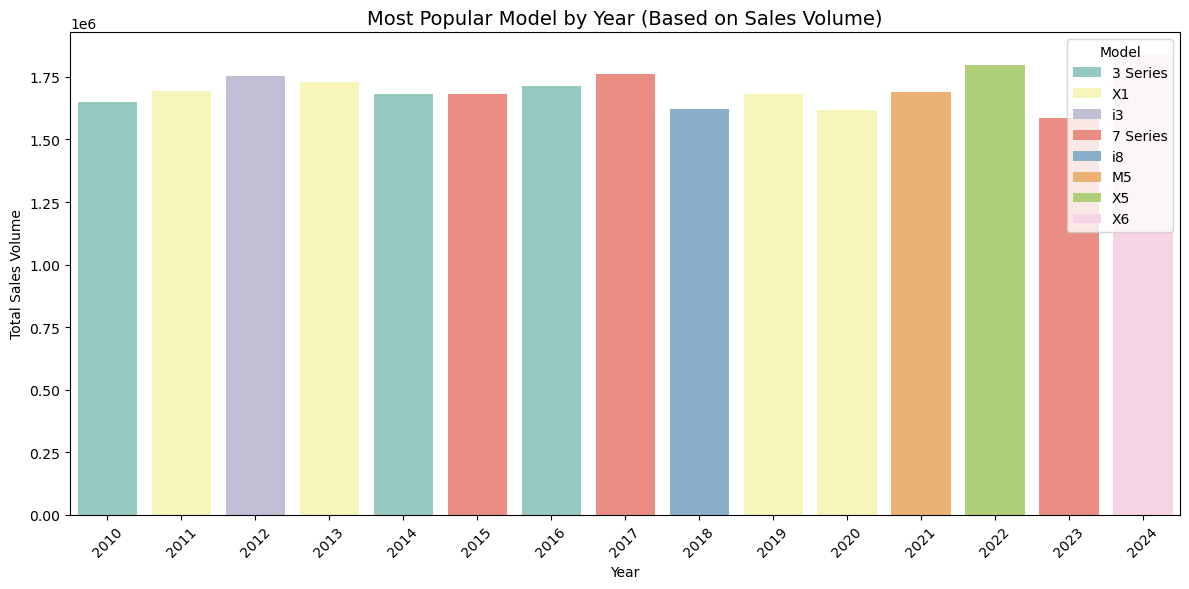

In [16]:
# Group by Year and Model, sum up Sales Volume
model_sales = df.groupby(['Year', 'Model'])['Sales_Volume'].sum().reset_index()

# For each year, get the model with the highest sales
top_models = model_sales.loc[model_sales.groupby('Year')['Sales_Volume'].idxmax()]

# Plot it
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='Year', y='Sales_Volume', hue='Model', palette='Set3')

plt.title('Most Popular Model by Year (Based on Sales Volume)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.legend(title='Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

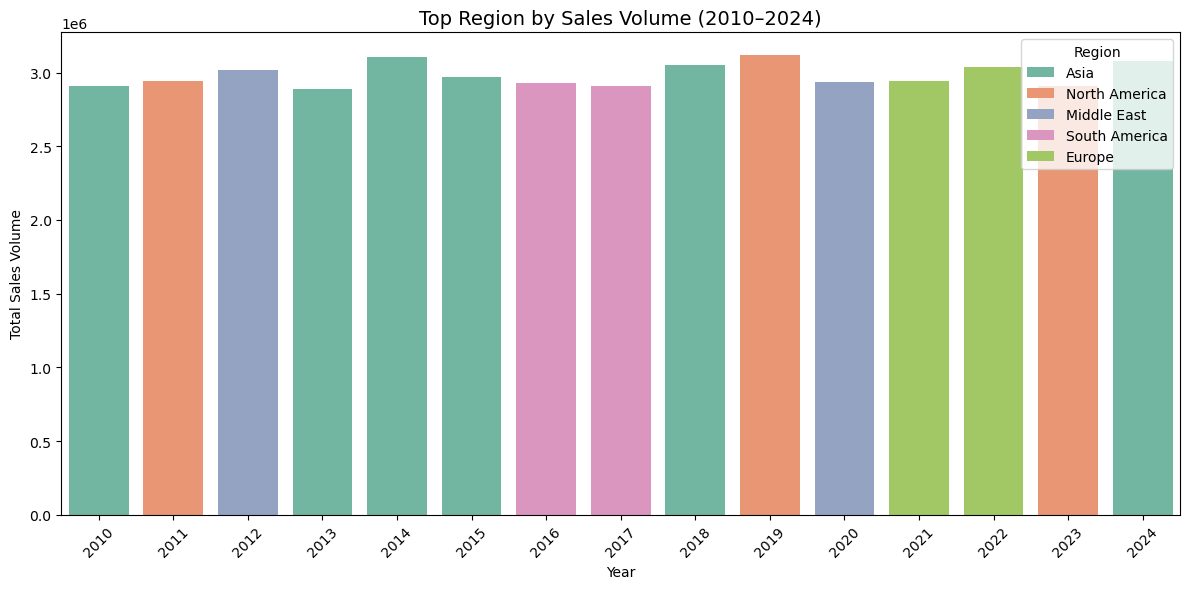

In [17]:
# Group by Year and Region, sum the Sales Volume
region_sales = df.groupby(['Year', 'Region'])['Sales_Volume'].sum().reset_index()

# Find which region was on top each year
top_regions = region_sales.loc[region_sales.groupby('Year')['Sales_Volume'].idxmax()]

# Plot the Graph
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x='Year', y='Sales_Volume', hue='Region', palette='Set2')

plt.title('Top Region by Sales Volume (2010–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.legend(title='Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

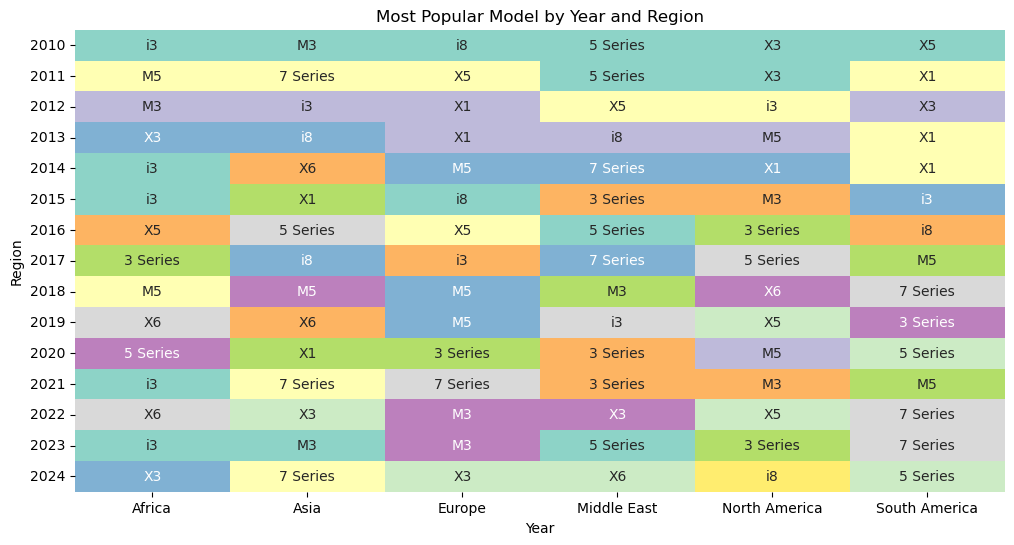

In [18]:
# pivot table: rows = Region, columns = Year, values = top model
pivot = df.groupby(['Year', 'Region'])['Model'].agg(lambda x: x.value_counts().index[0]).unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot.apply(lambda x: pd.factorize(x)[0]), annot=pivot, fmt='', cmap='Set3', cbar=False)
plt.title('Most Popular Model by Year and Region')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

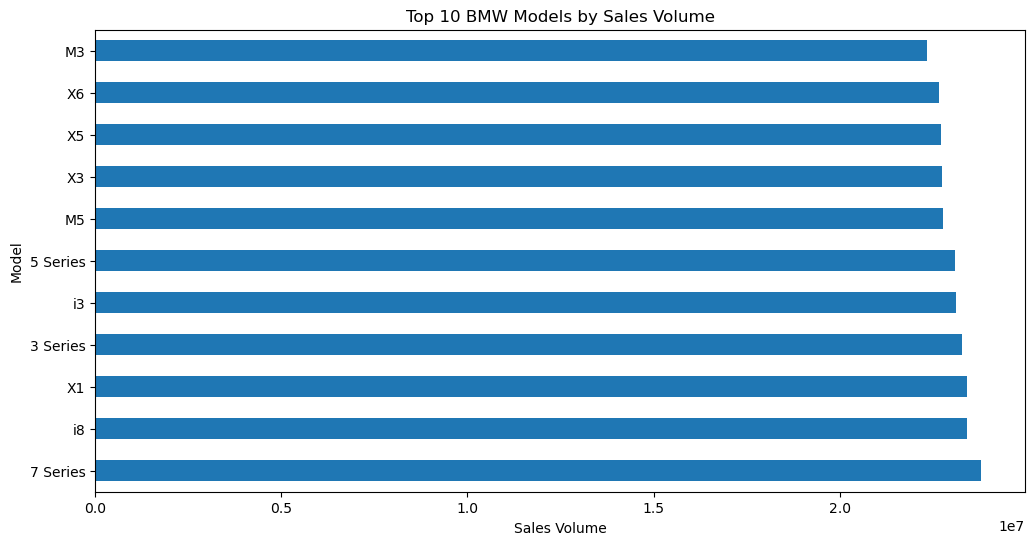

In [19]:
#Visualization for BMW Models by Sales Volume:
plt.figure(figsize=(12, 6))
top_model.plot(kind='barh')
plt.title('Top 10 BMW Models by Sales Volume')
plt.xlabel('Sales Volume')
plt.show()

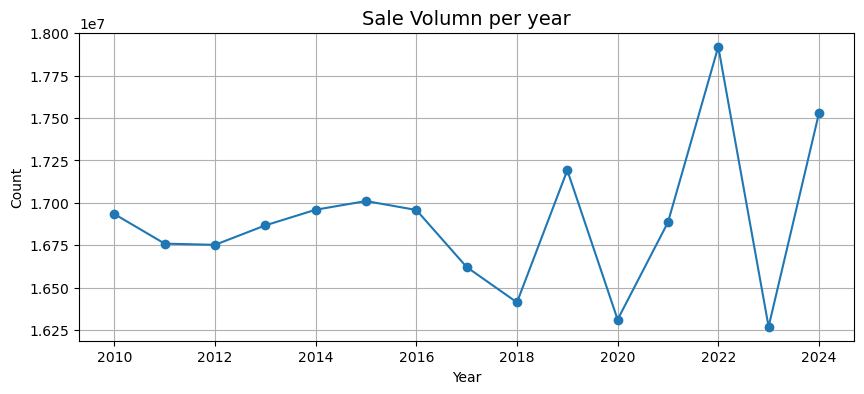

In [74]:
#Yearly sales analysis Visualization:
yearly_sales = df.groupby('Year')['Sales_Volume'].sum()
yearly_sales

plt.figure(figsize=(10, 4))
yearly_sales.plot(marker='o')
plt.title('BMW Sales Dynamics by Year')
plt.title('Sale Volumn per year', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count')


plt.grid(True)
plt.show()

In [21]:
#Regional analysis:
region_analysis = df.groupby('Region').agg({
    'Sales_Volume': 'sum', 
    'Price_USD': 'mean'
}).sort_values('Sales_Volume', ascending=False)
region_analysis 

,Sales_Volume,Price_USD
Region,,
Asia,42974277,75554.925006
Europe,42555138,74988.356851
North America,42402629,75070.054709
Middle East,42326620,74726.788487
Africa,41565252,74885.771598
South America,41551818,74973.598837


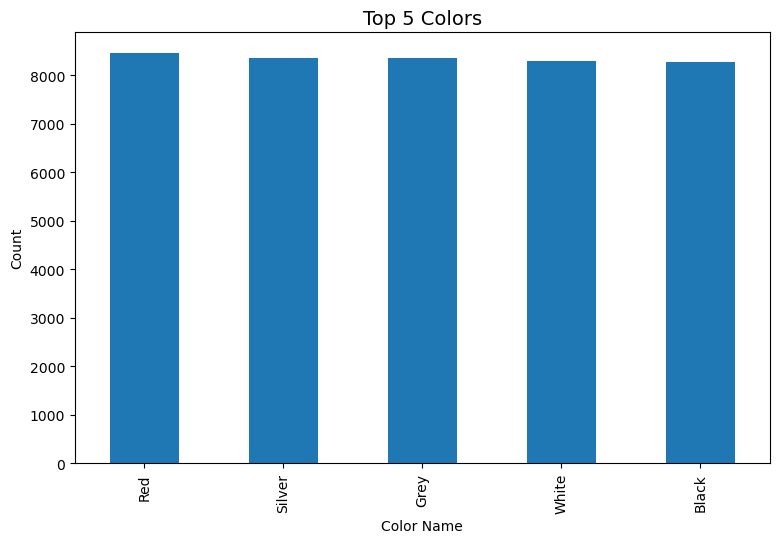

In [22]:
#Visualization by car colors:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['Color'].value_counts(). head(5).plot(kind='bar')


plt.title('Top 5 Colors', fontsize=14)
plt.xlabel('Color Name')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

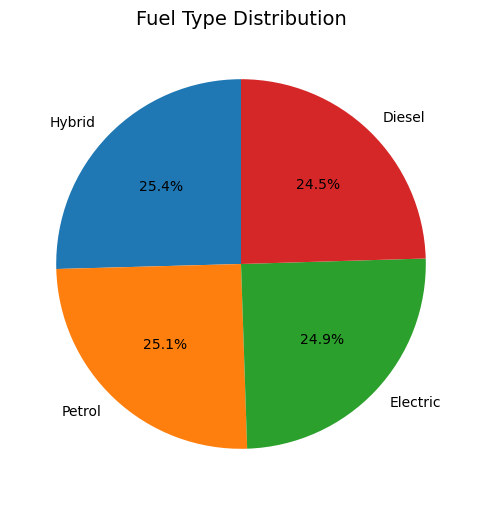

In [23]:
#Visualization Pie by fuel types;
plt.figure(figsize=(8,5))
df["Fuel_Type"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, figsize=(6,6))

plt.title("Fuel Type Distribution", fontsize=14)
plt.ylabel("")
plt.show()

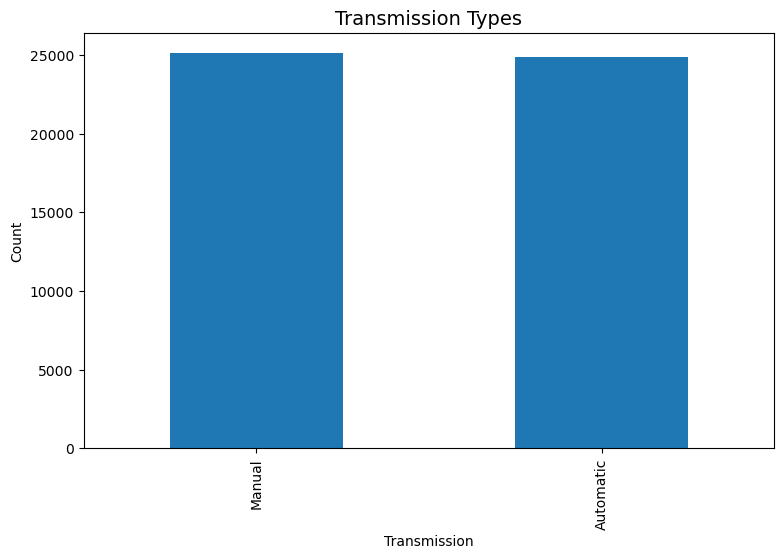

In [24]:
#Visualization by transmission
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
df['Transmission'].value_counts().plot(kind='bar')


plt.title('Transmission Types', fontsize=14)
plt.xlabel('Transmission')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

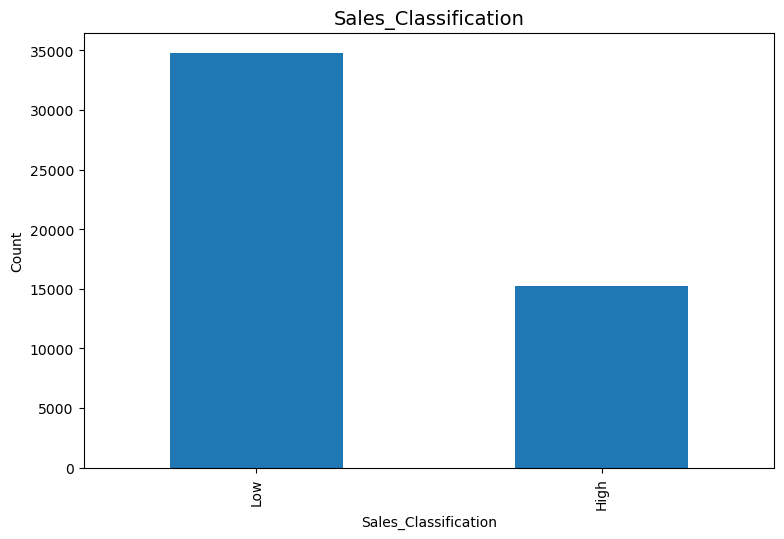

In [25]:
#Visualization by sales classification
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 4)
df['Sales_Classification'].value_counts().plot(kind='bar')

plt.title('Sales_Classification', fontsize=14)
plt.xlabel('Sales_Classification')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

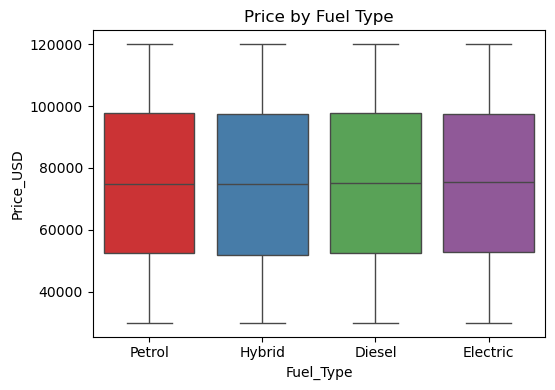

In [26]:
#Price analysis by features
plt.figure(figsize=(15, 4))

#Price by fuel type
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD',  palette='Set1')
plt.title('Price by Fuel Type')

plt.tight_layout()
plt.show()

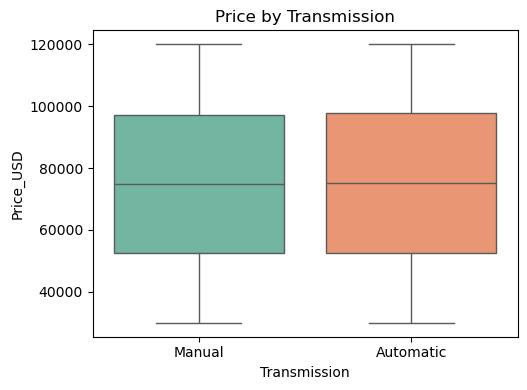

In [27]:
#Price by transmission
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Transmission', y='Price_USD', palette='Set2')
plt.title('Price by Transmission')

plt.tight_layout()
plt.show()

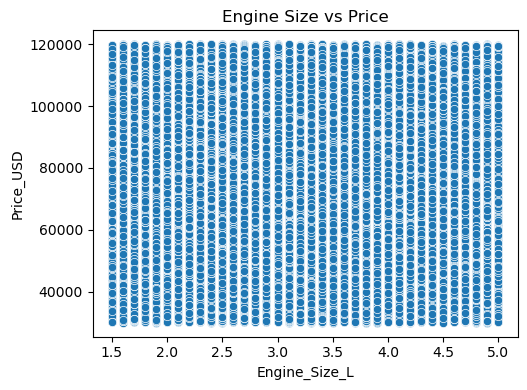

In [28]:
#Engine size vs price
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Engine_Size_L', y='Price_USD')
plt.title('Engine Size vs Price')


plt.tight_layout()
plt.show()

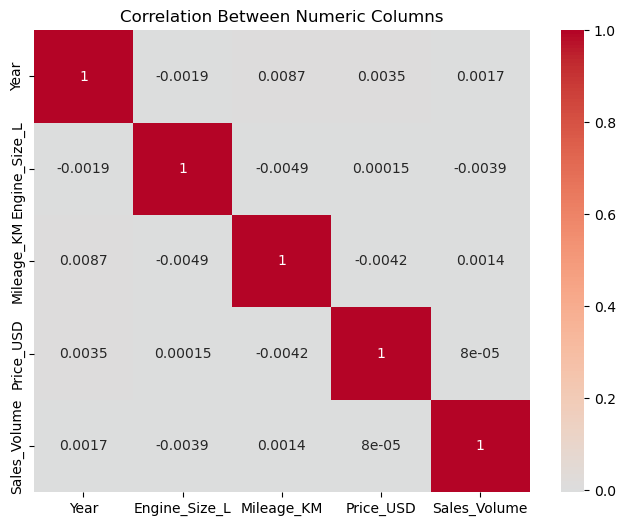

In [29]:
# Select only numeric columns (numbers only)
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation between numeric columns
correlation = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numeric Columns')
plt.show()

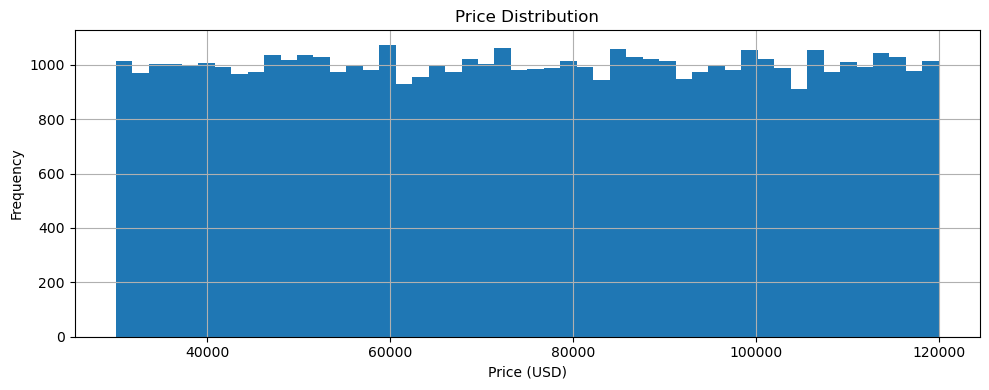

In [30]:
#Visualization of price distribution;
plt.figure(figsize=(10, 4))

df['Price_USD'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()